In [1]:
################### Advanced_processing ###################

"""Please note that "most_words_list_result.csv" describes the word frequencies for 27 tags; 27 classes.
Also,to make the sight clear, another "most_words_list_result.csv" files has been created for each 4 classes
separately (the last file is for 3 classes) for this data. You can see these files on GitHub.

"""

# So we have collected the data, in a clean way; also, we have done some processing.
# Now let's do some better processing, and make them ready more.

import csv
import pandas as pd
import re
from numpy import array, add, zeros
from nltk.stem import PorterStemmer 
from collections import Counter
   
ps = PorterStemmer() # to make each word in a 'stem' condition; it helps us to find the root of each word

most_words_list=[] # most words used in all classes

nt=4000 # number of tweets that you want to be collected for each tagword.

data_clean=pd.read_csv('tweet_information.csv') # reading the saved tweet_information file
data_clean=data_clean[['id', 'user', 'created_at', 'text', 'text_lenght', 'tag']]
most_words=pd.read_csv('most_words_list_result.csv') # reading the saved most_words_list_result file
ms=tuple(most_words['Word'])

def cleaner(text): # we have a str; but this str can be a list; so we convert it to list
    text=text.replace('[', '').replace(']', '').replace("'", '')
    text=text.split(', ')
    cleaned=[t for t in text   if t in ms]
    return(cleaned)

data_clean['text_clean']=data_clean['text'].apply(lambda text: cleaner(text))
data_clean['text_clean_lenght']=data_clean['text_clean'].apply(lambda text: len(text))
n_max= max(data_clean['text_clean_lenght'])
n_avg= sum(data_clean['text_clean_lenght'])/len(data_clean['text_clean_lenght'])

print(f'The maximum lenght of text_clean is: {n_max}') # we want to know the maximum lenght of the tweets
print(f'The average lenght of text_clean is: {n_avg}') # we want to know the average lenght of the tweets

The maximum lenght of text_clean is: 41
The average lenght of text_clean is: 11.565995480386295


In [2]:
%%time

data_clean=data_clean[['text_clean','tag']]

def eqa_len(alist): # each input of model should have the same size, so we add (( " " )) char, to the end of each list, to make all of them with size=41
    extra_len=n_max-len(alist)
    extra_len_list=list( [' ' for i in range(extra_len)] )
    return (array ( list(alist) + extra_len_list) )

data_clean['text_clean']=data_clean['text_clean'].apply(lambda alist: eqa_len(alist))

CPU times: user 1.79 s, sys: 170 ms, total: 1.96 s
Wall time: 1.98 s


In [3]:
label_dict={} # we want to make a dict for each of most_words's word, and it's related array
label_dict.update({' ': '00000000000' }) # the ' ' can be thought as the 0 array
for i in range(1,len(ms)+1):
    num=bin(i)[2:]
    for j in range(11-len(bin(i)[2:])):
        num='0'+num
    label_dict.update({ms[i-1]: num})

word_to_binary = pd.DataFrame(list(label_dict.items()),columns = ['word','binary']) # we want to keep this kind of coding, for future; so we save it
# resetting the index, and saving: let's keep the some information for future (for example, the one-hot encoder for the words)
word_to_binary=word_to_binary.reset_index(drop=True)
word_to_binary.to_csv('word_to_binary.csv',index=False)
word_to_binary

,word,binary
0,,00000000000
1,the,00000000001
2,you,00000000010
3,to,00000000011
4,and,00000000100
...,...,...
1781,close,11011110101
1782,desert,11011110110
1783,monkey,11011110111
1784,rescu,11011111000


In [4]:
def coding(word_list): # let's convert all data to these string of binary numbers
    return ([label_dict[x] for x in word_list])

data_clean['text_clean_code']=data_clean['text_clean'].apply(lambda alist: coding(alist)) # converting each word to a binary string
data_clean['text_clean_code']=data_clean['text_clean_code'].apply(lambda alist: ''.join(alist)) # concatenating all these binary strings; for each tweet

In [5]:
%%time
for i in range(0, len(data_clean['text_clean_code'][0]) ): # creating separated columns
    new_name='f'+str(i) # making new names for new columns; each column is for a single binary number (0 or 1)
    data_clean[new_name]= data_clean['text_clean_code'].apply(lambda string : string[i])

CPU times: user 17.7 s, sys: 945 ms, total: 18.7 s
Wall time: 18.9 s


In [6]:
# now, let's make a number for each class; the number are from 0 to 26; because we had 27 classes (27 tagwords)
tags=pd.read_csv('tags.csv')
tag_list=list(tags['the_tags'])
data_clean['tag_code']=data_clean['tag'].apply(lambda tag: tag_list.index(tag))

data_clean=data_clean.drop(['text_clean', 'tag', 'text_clean_code'], axis = 1)
data_clean

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f442,f443,f444,f445,f446,f447,f448,f449,f450,tag_code
0,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98676,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,26
98677,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,26
98678,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,26
98679,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,26


In [7]:
from sklearn.utils import shuffle
data_clean = shuffle(data_clean) # shuffling the data

# resetting the index, and saving: data_clean.csv is the file that we use to train our model.
data_clean=data_clean.reset_index(drop=True)
data_clean.to_csv('data_clean.csv',index=False)

data_clean.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f442,f443,f444,f445,f446,f447,f448,f449,f450,tag_code
0,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,7
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,17
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,17
3,0,0,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,12
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,8


In [8]:
# Sampling; choose 100 samples from "data_clean.csv"
from numpy import histogram
data_clean=pd.read_csv('data_clean.csv')
data_clean_sample_100 = data_clean.sample(n=100)

data_clean_sample_100=data_clean_sample_100.reset_index(drop=True)
data_clean_sample_100.to_csv('data_clean_sample_100.csv',index=False)

data_clean_sample_100.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f442,f443,f444,f445,f446,f447,f448,f449,f450,tag_code
0,0,0,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
3,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,19
4,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,18


In [9]:
MS=pd.read_csv('most_words_list_result.csv') # reading the saved most_words_list_result file
print(MS.head()) # The most frequent repetitive words in various classes (27 classes)
print('\n')
print(MS.tail()) # The lowest frequent repetitive words in various classes (27 classes)

  Word  Frequency
0  the         27
1  you         27
2   to         27
3  and         27
4    a         27


         Word  Frequency
1780    close          1
1781   desert          1
1782   monkey          1
1783    rescu          1
1784  honeybe          1


Text(0.5, 1.0, 'Histogram of ((frequency of repetitive words))\n in "most_words_list_result.csv" file ')

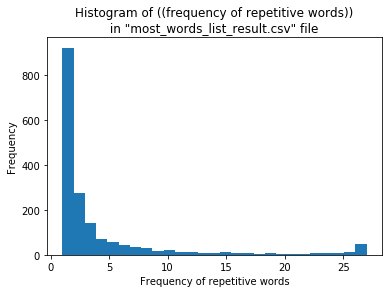

In [10]:
import matplotlib.pyplot as plt
MS_F=array(MS['Frequency'])
plt.hist(MS_F, bins=27)
plt.xlabel('Frequency of repetitive words')
plt.ylabel('Frequency')
plt.title('Histogram of ((frequency of repetitive words))\n in \"most_words_list_result.csv\" file ')

In [10]:
histog=histogram(MS['Frequency'], bins=27)
print(f'The first bin contains: {histog[0][0]} words')
print(f'The last bin contains:  {histog[0][-1]} words')
print(f'The total number of words is: {MS["Frequency"].shape[0]} words')
# you can see that about half of Frequency belongs to the first bin.
# if we want to be more precise: 920 words of total 1785 words have been frequent once.
# The bin of most frequent words of repetitive words (the last last bin: 27), only contains 50 words.

The first bin contains: 920 words
The last bin contains:  50 words
The total number of words is: 1785 words
